# Задача 1.3 #
*Рассмотреть систему без ограничений на длину очереди. Построить графики от числа операторов (вплоть до 15): математического ожидания числа занятых операторов; коэффициента загрузки операторов; вероятности существования очереди; математического ожидания длины очереди.*

## Исходные данные и подгрузка библиотек для расчета и визуализации

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np

In [48]:
number = 1
day_of_birth = 9
month_of_birth = 1
#t_c среднее время между поступлением заявок, t_s - средняя продолжительность обслуживания заявки, t_w - среднее приемлемое время ожидания обслуживания
t_c = 10 + number
t_s = 40+ day_of_birth
t_w = 100 + month_of_birth
print(f"Tc = {t_c} секунд \nTs = {t_s} секунд\nTw = {t_w} секунд")

Tc = 11 секунд 
Ts = 49 секунд
Tw = 101 секунд


## Рассчетная и графическая часть

In [49]:
#lmbd - интенсивность поступления заявок, mu - интенсивность обслуживания заявок
lmbd=1/t_c
mu=1/t_s
n, m = 15, 15 #число операторов и мест в очереди
lmbd_mu = lmbd/(mu)

print(f"Интенсивность поступления заявок: {lmbd} заявок/секунда\n\
Интенсивность обслуживания заявок: {mu} обслуженных заявок/секунда\n\
Приведенная интенсивность обслуживания заявок: {lmbd_mu} обслуженных заявок/секунда\n")

Интенсивность поступления заявок: 0.09090909090909091 заявок/секунда
Интенсивность обслуживания заявок: 0.02040816326530612 обслуженных заявок/секунда
Приведенная интенсивность обслуживания заявок: 4.454545454545455 обслуженных заявок/секунда



**Варьируя(вплоть до 15) n и m - число операторов и место в очереди соответственно, найдем Pотказа, M(n), Kзагр,и**

In [50]:
n_it = np.arange(1,n+1)

In [51]:
pi_p0 = np.array([pow(lmbd_mu,i)/math.factorial(i) for i in range(1,n+1)])

#коэф a
#a = np.array([lmbd_mu/n_it[i] if (lmbd_mu/n_it[i])<1 else 0 for i in range(0,n)])
a = np.array([lmbd_mu/n_it[i] for i in range(0,n)])
#Вероятность P0
p_0 = np.array([( 1/(1+(pi_p0[0:i+1].sum() + pi_p0[i]*(a[i]/(1-a[i]))))) for i in range (0,n)])

#Вероятность очереди
p_q = np.array([(pi_p0[i]*p_0[i]*(a[i]/(1-a[i]))) for i in range(0,n)])

#Матожидание числа занятых каналов
m_n = np.array([ p_0[i]*np.dot(pi_p0[0:i+1],n_it[0:i+1]).sum() + pi_p0[i]*(i+1)*p_0[i]*((a[i])/(1-a[i])) for i in range(0,n)])
#Матожидание длины очереди
m_q = np.array([pi_p0[i]*p_0[i]*((a[i])/pow((1-a[i]),2)) for i in range(0,n)])

#Коэффициент загрузки операторов
k_z = np.array([m_n[i]/(i+1) for i in range(0,n)])

Формирование таблицы для графиков

In [52]:
final_table = pd.DataFrame(list(zip(n_it, a, m_n, k_z, p_q, m_q)),columns =['Число операторов', 'Коэффициент а', 'Мат.ожидание числа занятых операторов','Коэффициент загрузки операторов', 'Вероятность существования очереди','Мат.ожидание длины очереди' ])
final_table.head(15)


,Число операторов,Коэффициент а,Мат.ожидание числа занятых операторов,Коэффициент загрузки операторов,Вероятность существования очереди,Мат.ожидание длины очереди
0,1,4.454545,4.454545,4.454545,19.842975,-5.744019
1,2,2.227273,4.454545,2.227273,6.847224,-5.579219
2,3,1.484848,4.454545,1.484848,3.006056,-6.199991
3,4,1.113636,4.454545,1.113636,1.407072,-12.382230
4,5,0.890909,4.454545,0.890909,0.661321,6.062114
5,6,0.742424,4.454545,0.742424,0.302904,1.175982
6,7,0.636364,4.454545,0.636364,0.132839,0.365307
7,8,0.556818,4.454545,0.556818,0.055172,0.124490
8,9,0.494949,4.454545,0.494949,0.021561,0.042691
9,10,0.445455,4.454545,0.445455,0.007903,0.014252


In [53]:
#Учитываем, что коэффициент а должен быть строго меньше 1
final_table_f = final_table[final_table['Коэффициент а']<1]
final_table_f.head(15)

,Число операторов,Коэффициент а,Мат.ожидание числа занятых операторов,Коэффициент загрузки операторов,Вероятность существования очереди,Мат.ожидание длины очереди
4,5,0.890909,4.454545,0.890909,0.661321,6.062114
5,6,0.742424,4.454545,0.742424,0.302904,1.175982
6,7,0.636364,4.454545,0.636364,0.132839,0.365307
7,8,0.556818,4.454545,0.556818,0.055172,0.124490
8,9,0.494949,4.454545,0.494949,0.021561,0.042691
9,10,0.445455,4.454545,0.445455,0.007903,0.014252
10,11,0.404959,4.454545,0.404959,0.002715,0.004562
11,12,0.371212,4.454545,0.371212,0.000875,0.001391
12,13,0.342657,4.454545,0.342657,0.000265,0.000403
13,14,0.318182,4.454545,0.318182,0.000075,0.000111


In [54]:
#final_table_f.plot()

array([<Axes: xlabel='Число операторов'>,
       <Axes: xlabel='Число операторов'>,
       <Axes: xlabel='Число операторов'>,
       <Axes: xlabel='Число операторов'>], dtype=object)

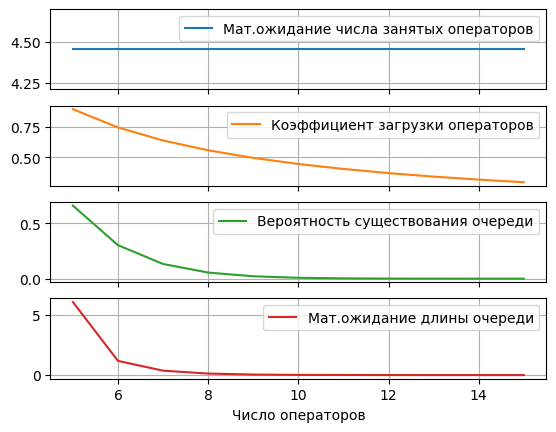

In [55]:
final_table_f.plot(x='Число операторов',y= ['Мат.ожидание числа занятых операторов', 'Коэффициент загрузки операторов','Вероятность существования очереди','Мат.ожидание длины очереди'], grid = True, subplots = True)